## Разработка метода Рабинера для идентифиакации матриц по последовательностям  

Имеем следующие классы стохастических матриц:  

1) Положительные  
2) Дважды стохастические  
3) С локальными вероятностными переходами  
4) Квазитреугольные (верхние и нижние)  
5) Блочно-сообщающиеся (правые и левые)  
6) Разреженные с энтропией, равной 0,2; 0,4; 0,6  

Импортируем необходимые библиотеки

In [423]:
import math
import pandas as pd
import numpy as np
import random
import quantecon as qe
import openpyxl
from openpyxl.writer.excel import save_workbook
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OutputCodeClassifier
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Считаем начальный вектор pi

In [2]:
def get_vector_pi(matrix, q):
    
    pi = []
    l = len(matrix[0])

    for i in range(0, l):
        if i == q[0]:
            pi.append(1)
        else:
            pi.append(0)
    
    return pi

Считаем вектора а

In [3]:
def get_a_vectors(matrix, q, ar):

    res = []
    s = 0

    for i in range(1, len(q)):
        for j in range(0, len(matrix)):
            if q[i] == j:
                for k in range(0, len(ar[0])):
                    s = s + ar[i-1][k] * matrix[k][j]
                res.append(s)
                s = 0
            else:
                res.append(0)
        ar.append(res)
        res = []
    
    return ar

Считаем вероятность принадлежности последовательности к матрице

In [4]:
def calculate_p(ar):
    return sum(ar[-1])

Собираем все функции воедино

In [5]:
def get_p(matrix, q):
    
    ar = []
    pi = get_vector_pi(matrix, q)
    ar.append(pi)
    ar = get_a_vectors(matrix, q, ar)
    p = calculate_p(ar)
    return p

### Результаты работы метода Рабинера в зависимости от длин последовательностей

Генерируем последовательности и матрицы

In [7]:
def transition_matrix(transitions):
    n = 1 + max(transitions)
    M = [[0]*n for _ in range(n)]
    
    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1
        
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

Создаем датасет с вероятностями, вычисленных по методу Рабинера

In [10]:
wb = openpyxl.load_workbook('Rabiner_dataset.xlsx')  
ws = wb.active

ws.cell(column=1,row=1).value = 'p для n = 10'
ws.cell(column=2,row=1).value = 'p для n = 20'
ws.cell(column=3,row=1).value = 'p для n = 30'
ws.cell(column=4,row=1).value = 'p для n = 40'
ws.cell(column=5,row=1).value = 'p для n = 50'
ws.cell(column=6,row=1).value = 'p для n = 60'
ws.cell(column=7,row=1).value = 'p для n = 70'
ws.cell(column=8,row=1).value = 'p для n = 80'
ws.cell(column=9,row=1).value = 'p для n = 90'
ws.cell(column=10,row=1).value = 'p для n = 100'
ws.cell(column=11,row=1).value = 'класс'

save_workbook(wb, 'Rabiner_dataset.xlsx')  

True

Считаем вероятности и собираем их в датасет. На место переменныхх matrix, r и c вставляем новые переменные

In [404]:
matrix = np.array([
    [0.000, 0.000, 0.014, 0.970, 0.016],
[0.000, 0.000, 0.415, 0.412, 0.173],
[0.000, 0.000, 0.397, 0.354, 0.249],
[0.356, 0.644, 0.000, 0.000, 0.000],
[0.502, 0.498, 0.000, 0.000, 0.000]
])

mc = qe.MarkovChain(matrix)
k = mc.simulate(100, init=0)
m = transition_matrix(k)

In [405]:
p = get_p(m, k)

In [407]:
wb = openpyxl.load_workbook('Rabiner_dataset.xlsx')  
ws = wb.active
r = 12
c = 11

ws.cell(column=c,row=r).value = 'Бл'

save_workbook(wb, 'Rabiner_dataset.xlsx')  

True

Итоговый датасет

In [408]:
data = pd.read_excel('Rabiner_dataset.xlsx')
data

,p для n = 10,p для n = 20,p для n = 30,p для n = 40,p для n = 50,p для n = 60,p для n = 70,p для n = 80,p для n = 90,p для n = 100,класс
0,0.017379,3.136432e-04,3.941825e-07,4.883007e-07,5.335751e-12,9.776646e-16,5.742416e-13,5.562241e-19,1.886856e-22,4.270183e-23,Р положит (резк)
1,0.000977,1.638400e-06,1.639216e-09,1.126951e-13,2.103738e-21,1.716755e-22,5.408517e-26,2.494754e-29,3.855916e-36,3.608309e-40,Бп
2,0.009259,7.589160e-08,1.705591e-15,3.374419e-21,3.053012e-26,9.708458e-34,1.415891e-39,3.338225e-44,1.847934e-49,2.040470e-60,Р положит (плав)
3,0.062500,8.372449e-08,1.072235e-14,5.832000e-22,4.297159e-26,1.374153e-30,2.650172e-42,1.016281e-42,5.397776e-52,1.493750e-59,Д
4,0.008640,1.405400e-04,1.644101e-08,6.612154e-12,1.528149e-17,4.482473e-22,5.964056e-23,5.802250e-27,1.081674e-27,4.179302e-32,Лп
5,0.000759,7.429485e-06,1.644795e-14,9.855719e-15,4.817092e-24,1.414774e-29,1.213477e-32,1.926097e-36,1.288968e-44,3.931787e-52,Н_20
6,0.037037,6.437302e-06,5.439105e-08,4.183312e-15,6.437213e-17,8.748693e-17,3.580116e-23,3.210640e-31,5.696184e-28,5.756737e-32,Н_40
7,0.003252,1.703535e-03,3.606892e-03,2.387335e-05,2.024945e-05,7.881069e-08,2.020797e-05,1.109338e-06,2.241976e-12,7.650666e-17,Н_60
8,0.016745,4.153950e-05,4.606524e-09,1.226152e-13,4.229767e-15,7.711240e-16,1.320015e-14,6.043325e-24,1.462769e-23,8.560054e-26,Тв
9,0.250000,6.018210e-06,2.948075e-04,5.877312e-10,4.642315e-17,8.844076e-15,2.619756e-07,2.372787e-12,1.792801e-17,1.792801e-17,Тн


Строим графики зависимости значения вероятности от длины последовательности для каждого класса

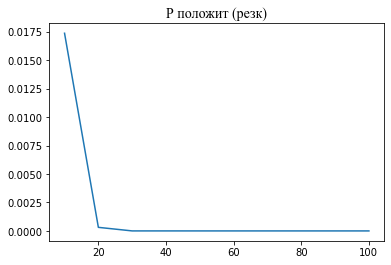

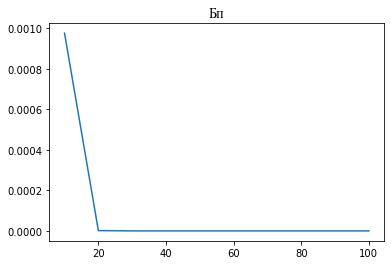

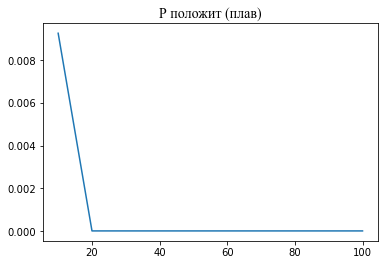

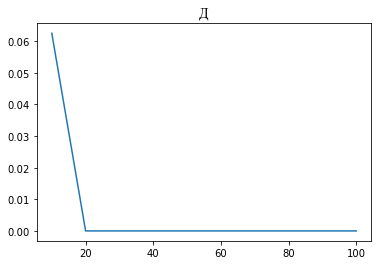

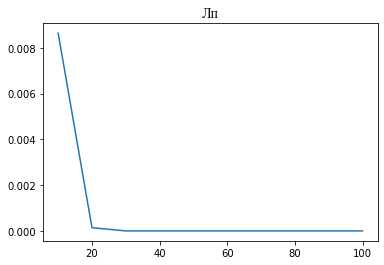

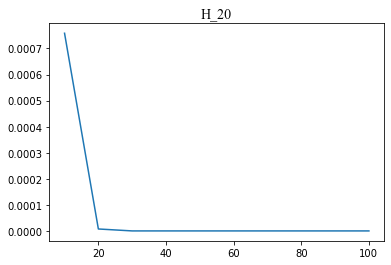

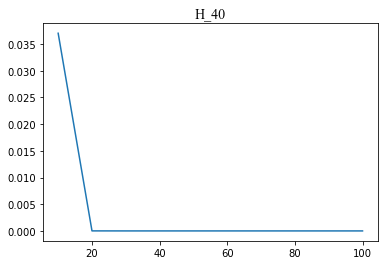

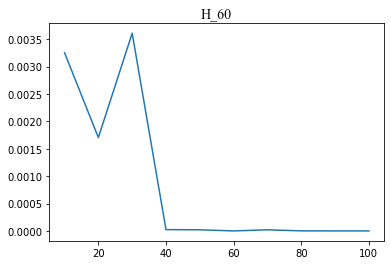

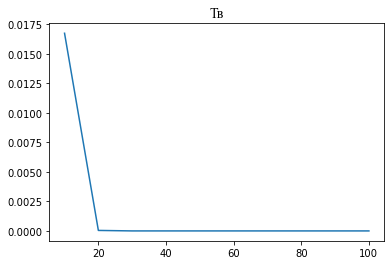

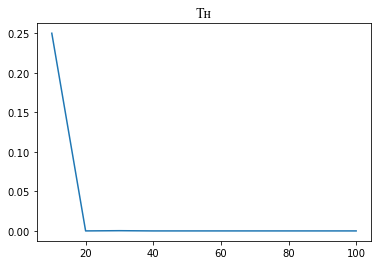

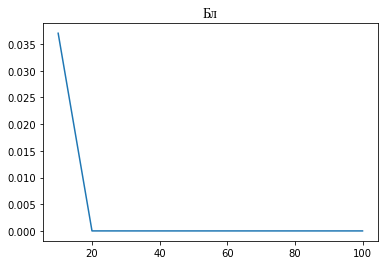

In [426]:
for i in range(0, 11):
    plt.figure()
    plt.title(data.iloc[i,:][10], fontsize=14, fontname='Times New Roman')
    plt.plot([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], [data.iloc[i,:][0], data.iloc[i,:][1], data.iloc[i,:][2], \
                                                        data.iloc[i,:][3], data.iloc[i,:][4], data.iloc[i,:][5], \
                                                        data.iloc[i,:][6], data.iloc[i,:][7], data.iloc[i,:][8], \
                                                        data.iloc[i,:][9]])
    plt.savefig(f'{data.iloc[i,:][10]}.png')

## Вывод  

Таким образом, удалось разработать метод Рабинера и проверить его работу на последовательностях разных длин. В целом видно, что чем больше длина последовательности, тем меньше значения вероятности принадлежности последовательности к матрице определенного класса.